# Dollar Rial Price 💰

In [371]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lls import LinearLeastSquare


In [372]:
data = pd.read_csv("Dollar_Rial_Price_Dataset.csv")
data

,Unnamed: 0,Date,Persian_Date,Open,Low,High,Close
0,0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"
...,...,...,...,...,...,...,...
3305,3305,7/1/2023,1402/04/10,"492,660","492,600","498,400","498,220"
3306,3306,7/2/2023,1402/04/11,"500,810","498,600","500,900","499,340"
3307,3307,7/3/2023,1402/04/12,"503,210","501,400","503,400","502,000"
3308,3308,7/4/2023,1402/04/13,"502,140","498,300","502,200","500,750"


In [373]:
data.dtypes

Unnamed: 0       int64
Date            object
Persian_Date    object
Open            object
Low             object
High            object
Close           object
dtype: object

In [374]:
# data['Date_Number'] = data['Date'].map(lambda date: 10000*date.year + 100*date.month + date.day)
# OR 

In [375]:
data['YearMonth'] = pd.to_numeric(pd.to_datetime(data['Date']).dt.strftime("%Y%m%d"))

In [376]:
data.drop(['Persian_Date'], axis=1, inplace=True)
data.drop(['Unnamed: 0'],axis=1 , inplace=True)

In [377]:
data['Date'] = pd.to_datetime(data['Date'])

for i in ['Open','Low','High','Close'] :
    data[i] = data[i].apply(lambda x: re.sub(',','', x)).astype(float)

data


,Date,Open,Low,High,Close,YearMonth
0,2011-11-27,13700.0,13700.0,13700.0,13700.0,20111127
1,2011-11-28,13440.0,13440.0,13440.0,13440.0,20111128
2,2011-11-29,13350.0,13350.0,13350.0,13350.0,20111129
3,2011-11-30,13400.0,13400.0,13400.0,13400.0,20111130
4,2011-12-01,13500.0,13500.0,13500.0,13500.0,20111201
...,...,...,...,...,...,...
3305,2023-07-01,492660.0,492600.0,498400.0,498220.0,20230701
3306,2023-07-02,500810.0,498600.0,500900.0,499340.0,20230702
3307,2023-07-03,503210.0,501400.0,503400.0,502000.0,20230703
3308,2023-07-04,502140.0,498300.0,502200.0,500750.0,20230704


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3310 non-null   datetime64[ns]
 1   Open       3310 non-null   float64       
 2   Low        3310 non-null   float64       
 3   High       3310 non-null   float64       
 4   Close      3310 non-null   float64       
 5   YearMonth  3310 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 155.3 KB


### Divide dataset to Ahmadinejad, Rouhani and Raisi's presidency

In [379]:
Ahmadinejad = data.loc[(data['Date'] >= "2011/11/27") & (data['Date'] < "2013/08/03")].reset_index()
Rouhani = data.loc[(data['Date'] >= "2013/08/03") & (data['Date'] < "2021/08/03")].reset_index()
Raisi = data.loc[(data['Date'] >= "2021/08/03") & (data['Date'] <= "2023/05/07")].reset_index()

print(Ahmadinejad.shape)
print(Rouhani.shape)
print(Raisi.shape)


(482, 7)
(2375, 7)
(406, 7)


In [380]:
Raisi

,index,Date,Open,Low,High,Close,YearMonth
0,2857,2021-08-03,255790.0,255690.0,258140.0,257290.0,20210803
1,2858,2021-08-04,257250.0,254690.0,257340.0,256190.0,20210804
2,2859,2021-08-05,256490.0,255790.0,256740.0,256190.0,20210805
3,2860,2021-08-07,254190.0,253990.0,257140.0,256380.0,20210807
4,2861,2021-08-08,256290.0,252390.0,257440.0,256890.0,20210808
...,...,...,...,...,...,...,...
401,3258,2023-05-02,547300.0,540520.0,547600.0,540520.0,20230502
402,3259,2023-05-03,531040.0,530800.0,539100.0,535240.0,20230503
403,3260,2023-05-04,539340.0,536110.0,540100.0,536840.0,20230504
404,3261,2023-05-06,534060.0,527300.0,535100.0,533370.0,20230506


### Show the highest dollar price in Ahmadinejad, Rouhani and Raisi's presidency respectively

In [381]:
max_dollar_price_Ahmadinejad = Ahmadinejad['High'].max()
max_dollar_price_Rouhani = Rouhani['High'].max()
max_dollar_price_Raisi = Raisi['High'].max()


print(f'highest dollar price in Ahmadinejad : {max_dollar_price_Ahmadinejad}')
print(f'highest dollar price in Rouhani : {max_dollar_price_Rouhani}')
print(f'highest dollar price in Raisi : {max_dollar_price_Raisi}')

highest dollar price in Ahmadinejad : 39700.0
highest dollar price in Rouhani : 320060.0
highest dollar price in Raisi : 555600.0


### Show the lowest dollar price in Ahmadinejad, Rouhani and Raisi's presidency respectively

In [382]:
min_dollar_price_Ahmadinejad = Ahmadinejad['Low'].min()
min_dollar_price_Rouhani = Rouhani['Low'].min()
min_dollar_price_Raisi = Raisi['Low'].min()


print(f'lowest dollar price in Ahmadinejad : {min_dollar_price_Ahmadinejad}')
print(f'lowest dollar price in Rouhani : {min_dollar_price_Rouhani}')
print(f'lowest dollar price in Raisi : {min_dollar_price_Raisi}')

lowest dollar price in Ahmadinejad : 13350.0
lowest dollar price in Rouhani : 12850.0
lowest dollar price in Raisi : 251250.0


###  Split each dataset to train and test with train_test_split function

In [383]:
Ahmadinejad.drop(['index'], axis=1, inplace=True)

<Axes: >

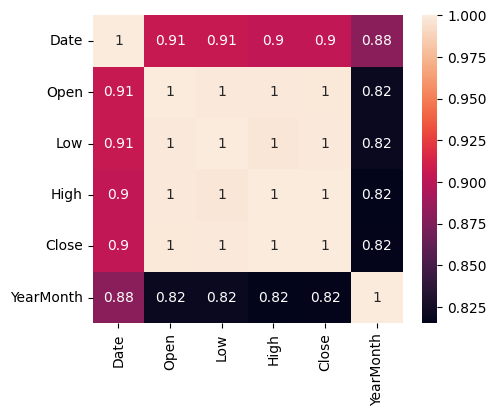

In [384]:
corr = Ahmadinejad.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr , annot=True)

In [385]:
Rouhani.drop(['index'], axis=1, inplace=True)

<Axes: >

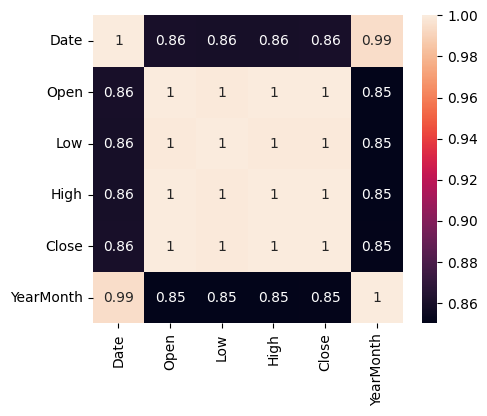

In [386]:
corr = Rouhani.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True)

In [387]:
Raisi.drop(['index'],axis=1 ,inplace=True)

<Axes: >

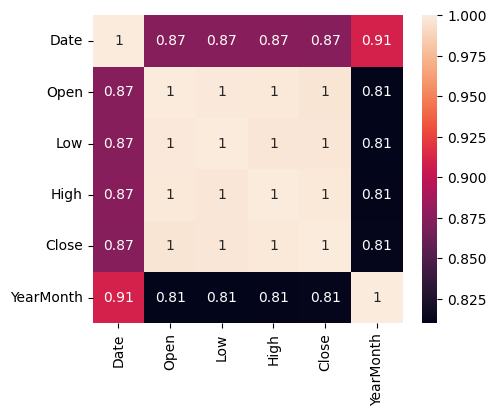

In [388]:
corr = Raisi.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr,annot=True)

In [389]:
X = np.array(Ahmadinejad[['YearMonth']])
Y = np.array(Ahmadinejad[['High']])

X_train , X_test , Y_train ,Y_test = train_test_split(X,Y ,shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(361, 1)
(121, 1)
(361, 1)
(121, 1)


### Fit the LLS model on each training dataset

In [390]:
lls = LinearLeastSquare()
lls.fit(X_train ,Y_train)
Y_pred_Ahmadinejad = lls.predict(X_test)

In [391]:
MAE_Ahmadinejad = lls.evaluate(X_test ,Y_test ,'mae')
print('Mean Absolute Error Custom LLs for Ahmadinejad:',MAE_Ahmadinejad)



Mean Absolute Error Custom LLs for Ahmadinejad: 7282.077651398324


### Scikit-Learn's Linear Regression 

In [392]:
reg = LinearLeastSquare()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

In [393]:
print('Mean Absolute Error Linear Regression for Ahmadinejad:', mean_absolute_error(Y_test,Y_pred_Ahmadinejad))

Mean Absolute Error Linear Regression for Ahmadinejad: 7282.077651398324


In [394]:
X1 = np.array(Rouhani[['YearMonth']])
Y1 = np.array(Rouhani[['High']])

X_train , X_test , Y_train ,Y_test = train_test_split(X1,Y1 ,shuffle=True)

lls = LinearLeastSquare()
lls.fit(X_train ,Y_train)
Y_pred_Rouhani = lls.predict(X_test)

MAE_Rouhani = lls.evaluate(X_test ,Y_test ,'mae')
print('Mean Absolute Error Custom LLs for Rouhani:',MAE_Rouhani)
print('Mean Absolute Error Linear Regression for Rouhani :', mean_absolute_error(Y_test,Y_pred_Rouhani))

Mean Absolute Error Custom LLs for Rouhani: 61065.5329852261
Mean Absolute Error Linear Regression for Rouhani : 61065.5329852261


In [395]:

X2 = np.array(Raisi[['YearMonth']])
Y2 = np.array(Raisi[['High']])

X_train , X_test , Y_train ,Y_test = train_test_split(X2,Y2 ,shuffle=True)

lls = LinearLeastSquare()
lls.fit(X_train ,Y_train)
Y_pred_Raisi = lls.predict(X_test)

MAE_Raisi = lls.evaluate(X_test ,Y_test ,'mae')
print('Mean Absolute Error Custom LLs for Raisi:',MAE_Raisi)
print('Mean Absolute Error Linear Regression for Raisi :', mean_absolute_error(Y_test,Y_pred_Raisi))

Mean Absolute Error Custom LLs for Raisi: 69951.43140136248
Mean Absolute Error Linear Regression for Raisi : 69951.43140136248
